## Breast Cancer Proteomes - With Merging clinical info and proteins data
### By Kartik Kaul

In [ ]:
pip install fancyimpute

In [20]:
import sklearn, re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.decomposition import PCA
import seaborn as se
from fancyimpute import KNN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,adjusted_mutual_info_score,adjusted_rand_score,homogeneity_score

In [5]:
df_proteomes = pd.read_csv('/Users/kartikkaul/Downloads/archive (10)/77_cancer_proteomes_CPTAC_itraq.csv',index_col = 0)
clinical = pd.read_csv('/Users/kartikkaul/Downloads/archive (10)/clinical_data_breast_cancer.csv',index_col=0)
PAM50  = pd.read_csv('/Users/kartikkaul/Downloads/archive (10)/PAM50_proteins.csv',header = 0)

In [6]:
df_proteomes

,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
RefSeq_accession_number,,,,,,,,,,,,,,,,,,,,,
NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NP_001191293,NaN,protein FAM24B precursor,NaN,NaN,NaN,-16.029761,1.729692,4.107251,-9.584499,-5.196859,...,-6.662350,NaN,NaN,NaN,NaN,NaN,NaN,-8.020071,-3.093822,-4.602418
NP_775791,NaN,putative uncharacterized protein C9orf62,NaN,NaN,NaN,-2.046065,-0.425182,-3.203370,-4.786183,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049608,-0.646977,0.240590
NP_004065,COX8A,"cytochrome c oxidase subunit 8A, mitochondrial",NaN,NaN,NaN,-1.778435,-0.149673,1.971481,-3.103949,-0.933726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
clinical

,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,M1,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,M0,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,M0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BH-A0C7,FEMALE,48,Positive,Negative,Positive,T2,T_Other,N1,Positive,M0,...,Luminal B,-3,0,4,4,LumA/B,5,4,1,3
TCGA-BH-A0DD,MALE,58,Positive,Positive,Positive,T2,T_Other,N1,Positive,M0,...,Luminal B,-3,-6,4,4,LumA/B,3,4,1,3
TCGA-C8-A12U,FEMALE,46,Positive,Positive,Negative,T2,T_Other,N1,Positive,M0,...,Luminal B,-5,-2,5,4,Basal,5,4,1,1


In [8]:
PAM50

,GeneSymbol,RefSeqProteinID,Species,Gene Name
0,MIA,NP_006524,Homo sapiens,melanoma inhibitory activity
1,FGFR4,NP_002002,Homo sapiens,fibroblast growth factor receptor 4
2,FGFR4,NP_998812,Homo sapiens,fibroblast growth factor receptor 4
3,FGFR4,NP_075252,Homo sapiens,fibroblast growth factor receptor 4
4,GPR160,NP_055188,Homo sapiens,G protein-coupled receptor 160
...,...,...,...,...
95,FOXC1,NP_001444,Homo sapiens,forkhead box C1
96,GRB7,NP_001025173,Homo sapiens,growth factor receptor-bound protein 7
97,GRB7,NP_005301,Homo sapiens,growth factor receptor-bound protein 7
98,MELK,NP_055606,Homo sapiens,maternal embryonic leucine zipper kinase


In [9]:
proteomes = df_proteomes.drop(['gene_symbol','gene_name'], axis=1)

In [10]:
proteomes.rename(columns=lambda x: "TCGA-%s" % (re.split('[_|-|.]',x)[0]) if bool(re.search("TCGA",x)) is True else x,inplace=True)
proteomes = proteomes.transpose()

In [11]:
proteomes

RefSeq_accession_number,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
TCGA-AO-A12D,1.096131,1.111370,1.111370,1.107561,1.115180,1.107561,1.111370,1.111370,-1.517390,0.482754,...,NaN,NaN,NaN,-0.340163,NaN,NaN,NaN,NaN,-0.633517,12.666488
TCGA-C8-A131,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,-1.045294,...,NaN,NaN,NaN,3.451902,NaN,NaN,NaN,NaN,4.840325,0.140736
TCGA-AO-A12B,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,NaN,NaN,NaN,-1.718531,NaN,NaN,NaN,NaN,-1.965192,-2.854835
TCGA-BH-A18Q,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
TCGA-C8-A130,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.457462,NaN,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,NaN,-0.047997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BH-A0C7,-0.552212,-0.547749,-0.552212,-0.552212,-0.556675,-0.547749,-0.552212,-0.552212,0.679466,0.487574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-A2-A0SX,-0.398560,-0.392601,-0.392601,-0.392601,-0.395581,-0.392601,-0.392601,-0.392601,-2.504862,0.694810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263d3f-I.CPTAC,0.598585,0.606697,0.603993,0.603993,0.603993,0.606697,0.603993,0.603993,-0.602132,2.778263,...,-2.162522,1.520756,NaN,NaN,NaN,-8.020071,0.049608,NaN,0.019861,NaN
blcdb9-I.CPTAC,-0.191285,-0.183918,-0.186022,-0.186022,-0.167079,-0.183918,-0.186022,-0.186022,-0.340726,1.367330,...,-4.357763,-2.386605,NaN,NaN,NaN,-3.093822,-0.646977,NaN,-1.718327,NaN


In [12]:
merged_data = proteomes.merge(clinical,left_index=True,right_index=True)

In [13]:
numerical_data = merged_data.loc[:,[x for x in merged_data.columns if bool(re.search("NP_|XP_",x)) == True]]
pam50_data = numerical_data.iloc[:,numerical_data.columns.isin(PAM50['RefSeqProteinID'])]

In [14]:
pam50_data

,NP_057427,NP_002408,NP_000415,NP_000413,NP_000517,NP_004439,NP_005219,NP_058519,NP_058518,NP_001116539,...,NP_057547,NP_054895,NP_001246,NP_055606,NP_036451,NP_000624,NP_569082,NP_001159,NP_001229,NP_002458
TCGA-A2-A0CM,2.160157,2.623021,4.768355,0.639321,4.933663,-4.419112,-0.271711,-6.013418,-6.013418,-6.318320,...,-1.292949,3.541400,3.177722,NaN,-1.792547,NaN,NaN,2.516489,2.556897,NaN
TCGA-A2-A0D2,2.249702,3.576941,2.169868,2.968207,0.543251,-5.421010,-1.206443,-5.297932,-5.277974,-5.311238,...,-3.694601,2.495856,2.722053,0.373604,-1.342826,-4.183584,-2.889608,3.487128,NaN,-0.714133
TCGA-A2-A0EQ,-0.020957,1.884936,-7.407249,-7.675146,-5.187535,-2.795601,7.158672,-9.114133,-8.762041,-9.573385,...,-1.410193,0.702364,-1.402538,NaN,NaN,1.934688,NaN,0.798041,2.003576,NaN
TCGA-A2-A0EV,-1.364604,-2.246793,-3.750716,-3.882344,-2.252395,-3.252209,-1.574649,-2.190781,-2.871327,-2.190781,...,0.018893,-1.574649,-4.515280,NaN,NaN,2.049328,NaN,-0.266769,-3.201798,-7.724769
TCGA-A2-A0EX,-2.506723,-2.953194,-0.803378,-2.315378,-0.098028,-1.643795,-1.212331,4.186597,3.976493,3.942726,...,-0.822137,-2.938187,-3.395914,-1.827636,0.082061,0.044543,-2.079011,-3.046991,2.554537,-0.443199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-C8-A138,-0.409316,0.739026,0.943825,1.415596,1.806910,-0.504402,-2.625542,-5.284283,-4.907597,-5.309883,...,-0.248402,-0.295945,-2.307371,4.641193,-1.799029,NaN,NaN,-2.076972,-0.851830,1.554568
TCGA-D8-A142,-0.415696,-1.232627,-2.823113,1.724231,0.668726,-3.130366,-0.462687,-6.427009,-6.195666,-6.427009,...,-2.320664,-1.232627,-1.438667,NaN,NaN,-0.910915,NaN,-0.075910,-0.101213,-7.659635
TCGA-E2-A154,-2.742664,-3.307172,-5.903908,-5.218972,-4.650701,-3.894260,-3.284592,2.861017,3.098110,2.981445,...,-0.202379,-2.772771,-6.268957,1.340609,1.826086,NaN,NaN,0.395999,-3.962001,-7.804418
TCGA-E2-A158,-0.781777,-1.588474,-3.732945,0.701651,0.213150,-2.531862,-0.277591,-4.456732,-4.665129,-4.665129,...,-2.155403,-0.183476,-0.732478,NaN,-0.611474,0.690446,NaN,NaN,3.240507,-2.090419


### Data preprocessing
#### Null Value Imputatation with KNN Imputer


In [15]:
pam50_data_ = KNN(k=3).fit_transform(pam50_data)

Imputing row 1/80 with 4 missing, elapsed time: 0.008


In [16]:
pam50_data_

array([[ 2.16015744,  2.62302061,  4.76835465, ...,  2.51648861,
         2.5568973 , -1.798724  ],
       [ 2.24970172,  3.57694103,  2.16986778, ...,  3.48712784,
         0.24596977, -0.71413343],
       [-0.0209573 ,  1.88493566, -7.40724933, ...,  0.79804088,
         2.00357559, -0.60721473],
       ...,
       [-2.74266425, -3.30717211, -5.90390825, ...,  0.39599944,
        -3.96200122, -7.80441803],
       [-0.78177666, -1.58847422, -3.73294524, ...,  0.13832362,
         3.24050703, -2.09041937],
       [ 0.22965842, -0.44137307, -1.18398126, ..., -0.4345125 ,
         1.85802818, -4.31546156]])

In [17]:
scaler = StandardScaler().fit(pam50_data_)
pam50_data_ = scaler.transform(pam50_data_)
np.set_printoptions(precision=3)
print(pam50_data_[0:5,:])

[[ 1.915e+00  1.787e+00  2.369e+00  9.568e-01  2.682e+00 -8.578e-01
   6.850e-01 -1.013e+00 -1.010e+00 -1.054e+00  1.318e+00 -1.537e+00
  -1.531e+00 -1.206e+00  1.562e+00  1.863e+00 -4.580e-01  9.945e-01
   1.367e+00 -1.187e+00  8.662e-01 -1.204e+00 -1.459e-01  2.179e+00
  -4.303e-01  1.997e-01  6.071e-01  4.986e-01 -1.728e+00  1.557e+00
   1.614e+00  5.386e-01  5.812e-01 -3.561e-01  2.334e+00  1.894e+00
   6.732e-01 -7.138e-01 -8.014e-01 -1.857e-02  1.790e+00  1.050e+00
   2.037e-01]
 [ 1.987e+00  2.311e+00  1.507e+00  1.730e+00  8.918e-01 -1.169e+00
   2.537e-01 -8.251e-01 -8.157e-01 -7.961e-01  1.637e+00 -2.233e+00
  -2.225e+00 -8.745e-01  8.146e-01  2.665e+00  1.258e+00  1.380e+00
   2.363e+00 -1.372e+00 -1.407e-01 -9.308e-01 -1.357e+00 -6.253e-03
   1.564e+00  2.251e+00  1.797e+00  1.423e+00 -2.569e+00  1.467e+00
   1.641e+00  3.759e+00  1.277e+00 -1.613e+00  1.697e+00  1.674e+00
   2.395e-01 -4.903e-01 -2.081e+00 -2.045e+00  2.402e+00 -2.895e-01
   6.261e-01]
 [ 1.775e-01  1.381e

In [23]:
n_clusters = [2,3,4,5,6,7,8,10,20,79]

def compare_k_means(k_list,data):
    ## Run clustering with different k and check the metrics
    for k in k_list:
        clusterer = KMeans(n_clusters=k)
        clusterer.fit(data)
        ## The higher (up to 1) the better
        print("Silhouette Coefficient for k == %s: %s" % (
        k, round(silhouette_score(data, clusterer.labels_), 4)))
        ## The higher (up to 1) the better
        print("Homogeneity score for k == %s: %s" % (
        k, round(homogeneity_score(merged_data['PAM50 mRNA'], clusterer.labels_),4)))
        print("Adjusted Rand score for k == %s: %s" % (
        k, round(adjusted_rand_score(merged_data['PAM50 mRNA'], clusterer.labels_),4)))
        print("------------------------")

In [24]:
imputer = SimpleImputer()
processed_numerical_random = numerical_data.iloc[:,np.random.choice(range(numerical_data.shape[1]),43)]
imputer_rnd = imputer.fit(processed_numerical_random)
processed_numerical_random = imputer_rnd.transform(processed_numerical_random)

In [26]:
## Check different numbers of clusters for the PAM50 proteins, there are 4 subtypes of cancer in this data
## 3 samples of healthy patients were dropped at the beginning...
compare_k_means(n_clusters,pam50_data_)
## seems that k==3 works good, the silhouette score is still high and the homogeneity score jumps ~2-fold
## this is what they report in the paper to be the best number of clusters!
## k == 79 has homogeneity score of 1.0, no wonder since the algorithm can assign all the points their separate clusters!
## However, for our application, such clustering would be worthless.

Silhouette Coefficient for k == 2: 0.1822
Homogeneity score for k == 2: 0.2985
Ajusted Rand score for k == 2: 0.2889
------------------------
Silhouette Coefficient for k == 3: 0.1426
Homogeneity score for k == 3: 0.4558
Ajusted Rand score for k == 3: 0.4772
------------------------
Silhouette Coefficient for k == 4: 0.1399
Homogeneity score for k == 4: 0.4734
Ajusted Rand score for k == 4: 0.4353
------------------------
Silhouette Coefficient for k == 5: 0.1269
Homogeneity score for k == 5: 0.435
Ajusted Rand score for k == 5: 0.325
------------------------
Silhouette Coefficient for k == 6: 0.1161
Homogeneity score for k == 6: 0.4698
Ajusted Rand score for k == 6: 0.371
------------------------
Silhouette Coefficient for k == 7: 0.0972
Homogeneity score for k == 7: 0.5666
Ajusted Rand score for k == 7: 0.3694
------------------------
Silhouette Coefficient for k == 8: 0.1015
Homogeneity score for k == 8: 0.5691
Ajusted Rand score for k == 8: 0.3527
------------------------
Silhouett

In [27]:
## Use random proteins for comparison
compare_k_means(n_clusters,processed_numerical_random)
## The scores should be significantly lower than for the PAM50 proteins!

Silhouette Coefficient for k == 2: 0.0929
Homogeneity score for k == 2: 0.0212
Ajusted Rand score for k == 2: 0.0019
------------------------
Silhouette Coefficient for k == 3: 0.0702
Homogeneity score for k == 3: 0.138
Ajusted Rand score for k == 3: 0.108
------------------------
Silhouette Coefficient for k == 4: 0.0753
Homogeneity score for k == 4: 0.1251
Ajusted Rand score for k == 4: 0.0489
------------------------
Silhouette Coefficient for k == 5: 0.0651
Homogeneity score for k == 5: 0.2034
Ajusted Rand score for k == 5: 0.0727
------------------------
Silhouette Coefficient for k == 6: 0.082
Homogeneity score for k == 6: 0.209
Ajusted Rand score for k == 6: 0.0653
------------------------
Silhouette Coefficient for k == 7: 0.0795
Homogeneity score for k == 7: 0.219
Ajusted Rand score for k == 7: 0.0854
------------------------
Silhouette Coefficient for k == 8: 0.0841
Homogeneity score for k == 8: 0.3176
Ajusted Rand score for k == 8: 0.0928
------------------------
Silhouette 

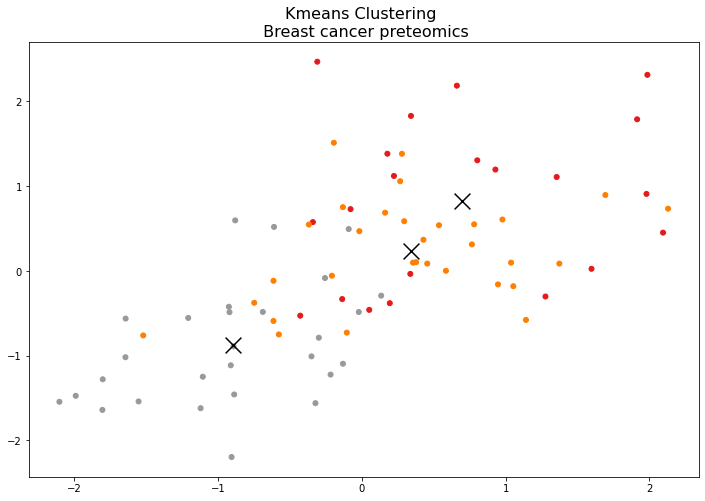

In [29]:
## Visualize data using k==3
clusterer_final = KMeans(n_clusters=3)
clusterer_final = clusterer_final.fit(pam50_data_)
processed_p50_plot = pd.DataFrame(pam50_data_)
processed_p50_plot['KMeans_cluster'] = clusterer_final.labels_
processed_p50_plot.sort_values('KMeans_cluster',axis=0,inplace=True)
fig = plt.figure(figsize=(12,8))

plt.scatter(pam50_data_[:,0], pam50_data_[:,1], c=clusterer_final.labels_, cmap="Set1_r", s=25)
plt.scatter(clusterer_final.cluster_centers_[:,0] ,clusterer_final.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Breast cancer preteomics", fontsize=16)
plt.show()

In [30]:
for n_component in range(1, 16, 2):
    pca = PCA(n_components=n_component)
    reduced_data = pca.fit_transform(pam50_data_)
    print('\nComponents: {}'.format(n_component))
    print('% of Variance Explained: {}'.format(sum(pca.explained_variance_ratio_)))
    compare_k_means(n_clusters, reduced_data)


Components: 1
% of Variance Explained: 0.3022125007653313
Silhouette Coefficient for k == 2: 0.5217
Homogeneity score for k == 2: 0.1751
Ajusted Rand score for k == 2: 0.1953
------------------------
Silhouette Coefficient for k == 3: 0.5985
Homogeneity score for k == 3: 0.3105
Ajusted Rand score for k == 3: 0.2757
------------------------
Silhouette Coefficient for k == 4: 0.5289
Homogeneity score for k == 4: 0.3023
Ajusted Rand score for k == 4: 0.1882
------------------------
Silhouette Coefficient for k == 5: 0.521
Homogeneity score for k == 5: 0.3504
Ajusted Rand score for k == 5: 0.2067
------------------------
Silhouette Coefficient for k == 6: 0.5316
Homogeneity score for k == 6: 0.3459
Ajusted Rand score for k == 6: 0.1861
------------------------
Silhouette Coefficient for k == 7: 0.5313
Homogeneity score for k == 7: 0.3808
Ajusted Rand score for k == 7: 0.1749
------------------------
Silhouette Coefficient for k == 8: 0.5514
Homogeneity score for k == 8: 0.3764
Ajusted Ran

#### After analysis Kmeans clustering with 5 PCA components

In [31]:
pca=PCA(n_components=5)
ProteomicsX_pca=pca.fit(pam50_data_)
ProteomicsX_pca2=ProteomicsX_pca.transform(pam50_data_)
print(pca.explained_variance_ratio_)

[0.302 0.11  0.086 0.067 0.046]


In [32]:
n_clusters = 5
KMeansModel=KMeans(n_clusters=n_clusters, init='k-means++')
KMeanData=ProteomicsX_pca2
KMeansModel.fit(KMeanData)
labels=KMeansModel.labels_
centroids=KMeansModel.cluster_centers_
print("LABELS",labels)
print("----------------------------")
print("Centroids",centroids)

LABELS [1 1 3 0 0 3 2 1 2 0 0 0 0 2 1 1 2 2 3 2 3 2 0 3 0 2 1 3 0 1 2 0 0 0 3 3 1
 3 0 0 0 3 3 2 1 0 3 2 4 1 0 0 2 0 1 0 1 2 2 3 2 0 0 1 3 1 2 2 1 4 2 1 1 1
 4 3 1 0 1 3]
----------------------------
Centroids [[-4.142 -0.185 -1.246  0.072  0.31 ]
 [ 4.659 -0.909 -1.197 -0.133  0.541]
 [ 0.311  2.764  0.965  0.639  0.066]
 [-0.149 -0.861  1.448 -1.172 -1.039]
 [-0.379 -4.516  4.015  2.75  -0.834]]


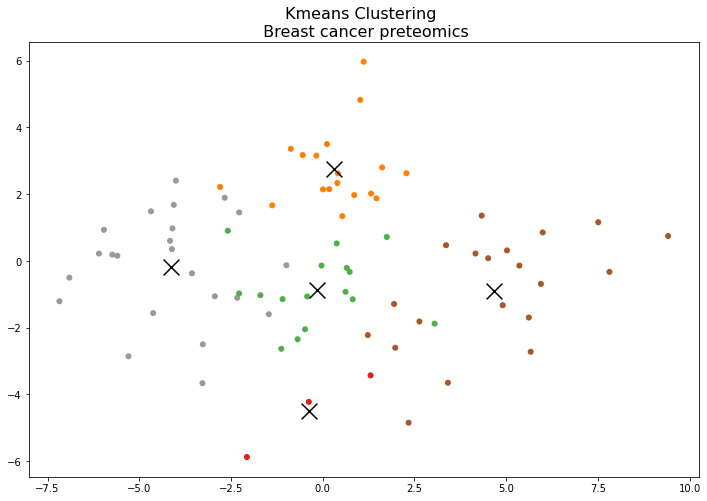

In [33]:
fig = plt.figure(figsize=(12,8))

plt.scatter(KMeanData[:,0], KMeanData[:,1], c=KMeansModel.labels_, cmap="Set1_r", s=25)
plt.scatter(KMeansModel.cluster_centers_[:,0] ,KMeansModel.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Breast cancer preteomics", fontsize=16)
plt.show()